**PREDICTION MODEL**

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from collections import Counter
import json
import string
import codecs
import matplotlib.pyplot as plt
#LARGE_FIGSIZE = (16,11)
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
ls data/

fullset-of-reciprocated-data-class10.csv  pseudoanonymised-set.csv
ml-training-dataset.csv                   random_one_edges.csv
pairwise-prediction-data1.csv             unanonymised-set.csv


In [5]:
df = pd.read_csv('data/ml-training-dataset.csv')
df.head(3)

,Pairs,Reciprocity_A,Reciprocity_B,Reciprocity_AB,PMentioning_AB,PRetweet_AB,TextSentiment_A,TextSentiment_B,TextSimilarity_AB,Interestingness_AB,Class
1,"('whi14', 'FCE11')",0.247685,0.716981,0.336477,0,0.0,0.7906,0.2960,0.61,0.0,1
2,"('whi14', 'Rim13')",0.247685,0.571429,0.318452,0,0.0,0.7906,0.0000,0.63,0.0,1
3,"('whi14', 'Avr13')",0.247685,0.619802,0.324443,0,0.0,0.7906,0.7096,0.62,0.0,1


In [6]:
len(df)

1507

    #FEATURES AND LABELS ... 

In [7]:
X = df.drop('Pairs', axis=1)
X.head()

,Reciprocity_A,Reciprocity_B,Reciprocity_AB,PMentioning_AB,PRetweet_AB,TextSentiment_A,TextSentiment_B,TextSimilarity_AB,Interestingness_AB,Class
1,0.247685,0.716981,0.336477,0,0.0,0.7906,0.2960,0.61,0.0,1
2,0.247685,0.571429,0.318452,0,0.0,0.7906,0.0000,0.63,0.0,1
3,0.247685,0.619802,0.324443,0,0.0,0.7906,0.7096,0.62,0.0,1
4,0.247685,0.531941,0.313562,0,0.0,0.7906,0.0000,0.60,0.0,1
0,0.819761,0.784127,1.141160,0,0.0,-0.5994,-0.8225,0.58,0.0,1


In [8]:
y = X.pop('Class')
y = y.astype(np.int32)
len(X), len(y)

(1507, 1507)

In [9]:
#DATA SPLIT: 
#RANDOM FOREST .. 
#rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy',oob_score=True, n_jobs=-1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.3)

**MODELS**

In [10]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler

    #1: Gradient Boosting:

In [11]:
#DATA SCALING: 
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.3)
gtb_clf = GradientBoostingClassifier(n_estimators=1000, loss = 'exponential',\
                                     max_depth=2, learning_rate=0.1)

In [13]:
%time gtb_clf.fit(X_train2, y_train2)

CPU times: user 1.33 s, sys: 7.97 ms, total: 1.34 s
Wall time: 1.37 s


GradientBoostingClassifier(loss='exponential', max_depth=2, n_estimators=1000)

In [14]:
y_pred2 = gtb_clf.predict(X_test2)

In [15]:
from sklearn.metrics import accuracy_score
gtb_accuracy = accuracy_score (y_test2, y_pred2)
print (gtb_accuracy)

0.847682119205298


In [17]:
gtb_roc_score = roc_auc_score(y_test2, y_pred2)
print (gtb_roc_score)

0.8468501935635241


In [18]:
gtb_proba = gtb_clf.predict_proba(X_test2)[:,1]
gtb_proba.shape

(453,)

In [19]:
# auc, accuracy and classification report :
from sklearn.metrics import accuracy_score, classification_report
print ('Model AUC: %2.4f '% roc_auc_score(y_test2,y_pred2))
print ('Model accuracy: %2.4f '% accuracy_score(y_test2, y_pred2))
print ('Gradient Tree Boosting Classification Report:')
print(classification_report(y_test2, y_pred2))

Model AUC: 0.8469 
Model accuracy: 0.8477 
Gradient Tree Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       214
           1       0.85      0.86      0.86       239

    accuracy                           0.85       453
   macro avg       0.85      0.85      0.85       453
weighted avg       0.85      0.85      0.85       453



In [20]:
#from sklearn.metrics import confusion_matrix
#conf_mat2 = confusion_matrix(y_test2,y_pred2)
#print(conf_mat2)

[[178  36]
 [ 33 206]]


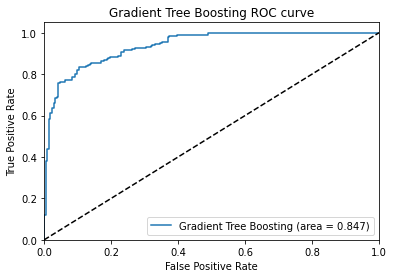

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
#rf_roc_score = roc_auc_score(y_test1,y_pred1)
fpr,tpr,thresholds=roc_curve(y_test2, gtb_proba)
plt.figure()
plt.plot(fpr,tpr,label='Gradient Tree Boosting (area = %0.3f)' % gtb_roc_score)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Tree Boosting ROC curve')
plt.legend(loc='lower right')
plt.show()

CPU times: user 1min 4s, sys: 19.6 ms, total: 1min 4s
Wall time: 1min 4s


<module 'matplotlib.pyplot' from '/home/ijdutse/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/pyplot.py'>

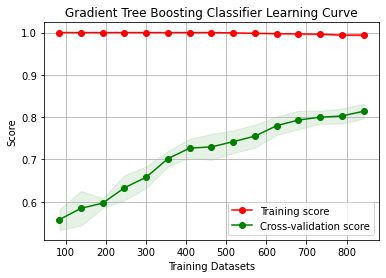

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
title = 'Gradient Tree Boosting Classifier Learning Curve'
%time plot_learning_curve(gtb_clf,title,X_train2,y_train2)

In [23]:
print(gtb_clf.score(X_train2,y_train2))
print(gtb_clf.score(X_test2,y_test2))

print('Train Score: ' %gtb_clf.score(X_train2,y_train2))
print('Test Score: ' %gtb_clf.score(X_test2,y_test2))


0.9886148007590133
0.847682119205298
Train Score: 
Test Score: 


    #OTHERS .... 

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 15)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Datasets")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [70]:
##########################################################################################